In [6]:
import os, sys
import numpy as np
import rasterio
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import getpass

import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

%matplotlib inline

In [7]:
# connect to the API
user = 'joemcglinchy'
# user = input('Sentinel Hub Username: ')
pw = getpass.getpass('Sentinel Hub Password: ')
api = SentinelAPI(user, pw, 'https://scihub.copernicus.eu/dhus')

# download single scene by known product id
#api.download(<product_id>)

Sentinel Hub Password: ········


In [9]:
api

## specify a geometry from http://geojson.io ... this is near Denver 

In [33]:
gj_geom = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -105.15220642089844,
              39.69345079688953
            ],
            [
              -104.952392578125,
              39.69345079688953
            ],
            [
              -104.952392578125,
              39.836486422931394
            ],
            [
              -105.15220642089844,
              39.836486422931394
            ],
            [
              -105.15220642089844,
              39.69345079688953
            ]
          ]
        ]
      }
    }
  ]
}

## Execute a search query. for all keyword options, see lower section of https://scihub.copernicus.eu/twiki/do/view/SciHubUserGuide/3FullTextSearch 

In [34]:
# search by polygon, time, and Hub query keywords
footprint = geojson_to_wkt(gj_geom)
products_S2 = api.query(footprint,
                     date = ('20151219', date(2016, 12, 29)),
                     platformname = 'Sentinel-2',
                     cloudcoverpercentage = (0, 30))

products_S1 = api.query(footprint,
                     date = ('20151219', date(2016, 12, 29)),
                     platformname = 'Sentinel-1')

Querying products: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:01<00:00, 72.51 products/s]


In [35]:
s1_items = list(products_S1.items())
s1_items[0]

# should also be able to convert to pandas
s1_res_df = api.to_geodataframe(products_S1)

In [38]:
# s1_res_df.plot()
# plt.show()
s1_res_df


,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,missiondatatakeid,orbitnumber,...,polarisationmode,productclass,producttype,platformname,size,status,uuid,productconsolidation,processed,geometry
000db30e-8f33-4f97-86f7-6277a82add63,S1A_IW_RAW__0SSV_20161216T130058_20161216T1301...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-12-16T13:00:58.21Z, Instrument: SAR...",2016-12-17 06:20:24.897,2016-12-16 13:00:58.210,2016-12-16 13:01:30.610,95649,14405,...,VV,S,RAW,Sentinel-1,729.69 MB,ARCHIVED,000db30e-8f33-4f97-86f7-6277a82add63,SLICE,NaN,"POLYGON ((-105.1616 41.1633, -105.5654 39.2089..."
008b4938-27b9-4ff7-b587-8f1b238f64af,S1A_IW_GRDH_1SDV_20160830T010152_20160830T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-08-30T01:01:52.507Z, Instrument: SA...",2016-08-30 05:49:23.784,2016-08-30 01:01:52.507,2016-08-30 01:02:17.506,82845,12823,...,VV VH,S,GRD,Sentinel-1,1.6 GB,ARCHIVED,008b4938-27b9-4ff7-b587-8f1b238f64af,NaN,F,"POLYGON ((-107.757584 39.358044, -104.808762 3..."
0129c420-eb88-43cc-9f5b-63e4ca157caa,S1A_IW_SLC__1SSV_20160531T130930_20160531T1309...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-05-31T13:09:30.642Z, Instrument: SA...",2016-05-31 17:25:56.499,2016-05-31 13:09:30.642,2016-05-31 13:09:58.531,71851,11503,...,VV,S,SLC,Sentinel-1,3.65 GB,ARCHIVED,0129c420-eb88-43cc-9f5b-63e4ca157caa,NaN,F,"POLYGON ((-105.193665 37.982143, -108.022148 3..."
01c86f0f-a781-4fd4-9feb-866948b62c0d,S1A_IW_SLC__1SSV_20160225T130859_20160225T1309...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-02-25T13:08:59.337Z, Instrument: SA...",2016-02-25 16:30:30.707,2016-02-25 13:08:59.337,2016-02-25 13:09:29.176,60992,10103,...,VV,S,SLC,Sentinel-1,3.92 GB,ARCHIVED,01c86f0f-a781-4fd4-9feb-866948b62c0d,NaN,NaN,"POLYGON ((-104.794502 39.520458, -107.694511 3..."
02996e06-411f-43b4-a7d5-3c9435038186,S1A_IW_GRDH_1SSV_20160923T010218_20160923T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-09-23T01:02:18.659Z, Instrument: SA...",2016-09-23 04:29:00.762,2016-09-23 01:02:18.659,2016-09-23 01:02:43.658,85773,13173,...,VV,S,GRD,Sentinel-1,824.85 MB,ARCHIVED,02996e06-411f-43b4-a7d5-3c9435038186,NaN,F,"POLYGON ((-108.155952 40.868618, -105.138733 4..."
035f3cdd-0c89-4a76-acdd-8447abc37462,S1A_IW_SLC__1SSV_20160303T130117_20160303T1301...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-03-03T13:01:17.18Z, Instrument: SAR...",2016-03-03 16:20:33.651,2016-03-03 13:01:17.180,2016-03-03 13:01:47.014,61713,10205,...,VV,S,SLC,Sentinel-1,3.94 GB,ARCHIVED,035f3cdd-0c89-4a76-acdd-8447abc37462,NaN,NaN,"POLYGON ((-103.185036 37.633995, -106.017715 3..."
0592d15a-fe07-478d-a59b-bbe229ece001,S1B_IW_GRDH_1SDV_20161104T010135_20161104T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-11-04T01:01:35.516Z, Instrument: SA...",2016-11-05 22:12:22.279,2016-11-04 01:01:35.516,2016-11-04 01:02:03.887,19438,2802,...,VV VH,S,GRD,Sentinel-1,1.78 GB,ARCHIVED,0592d15a-fe07-478d-a59b-bbe229ece001,NaN,F,"POLYGON ((-108.161362 41.001011, -105.212753 4..."
0e7cd2b9-3102-4ffd-9faf-2ebcb6f23bde,S1A_IW_SLC__1SSV_20160526T010146_20160526T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,h

In [85]:
## subset by 'producttype'
prod_groups = s1_res_df.groupby('producttype')
list(prod_groups)[0][1].shape

(60, 34)

In [53]:
# download a couple scenes by uuid
# help(api.download)
uuid = s1_res_df['uuid'][1]
title = s1_res_df['title'][1]
api.download(uuid)

Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.02G/1.02G [33:48<00:00, 3.23MB/s]
MD5 checksumming: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.02G/1.02G [00:02<00:00, 479MB/s]


{'date': datetime.datetime(2016, 8, 30, 1, 1, 52, 507000),
 'downloaded_bytes': 1023061143,
 'footprint': 'POLYGON((-107.757584 39.358044,-104.808762 39.756580,-104.484230 38.257141,-107.371315 37.857552,-107.757584 39.358044))',
 'id': '008b4938-27b9-4ff7-b587-8f1b238f64af',
 'md5': 'A635CC0BD960CDBDBF1A2F7C258EF2D7',
 'path': '.\\S1A_IW_GRDH_1SDV_20160830T010152_20160830T010217_012823_01439D_86AC.zip',
 'size': 1023061143,
 'title': 'S1A_IW_GRDH_1SDV_20160830T010152_20160830T010217_012823_01439D_86AC',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('008b4938-27b9-4ff7-b587-8f1b238f64af')/$value"}

In [54]:
## you can get the path by assigning the download call to a variable 
# zippath = dl['path']
zippath = os.path.join('.', title + '.zip')
zippath

'.\\S1A_IW_GRDH_1SDV_20160830T010152_20160830T010217_012823_01439D_86AC.zip'

In [55]:
## unzip the file
import zipfile
zip_ref = zipfile.ZipFile(zippath, 'r')
zip_ref.extractall(os.path.join('.', 's1_files'))
zip_ref.close()

In [56]:
zippath

'.\\S1A_IW_GRDH_1SDV_20160830T010152_20160830T010217_012823_01439D_86AC.zip'

In [59]:
## open the file with rasterio
s1_filepath = r"C:\Projects\sentinel_api\s1_files\S1A_IW_RAW__0SSV_20161216T130058_20161216T130130_014405_0175A1_975B.SAFE\s1a-iw-raw-s-vv-20161216t130058-20161216t130130-014405-0175a1.dat"
s1_filepath = r"C:/Projects/sentinel_api/s1_files/S1A_IW_GRDH_1SDV_20160830T010152_20160830T010217_012823_01439D_86AC.SAFE/manifest.safe"

with rasterio.open(s1_filepath, 'r') as src:
    print(src.profile)
    arr = src.read()
    print(arr.shape)

!gdalinfo $s1_filepath

C:\software\Anaconda3\envs\eapy_gbdx\lib\site-packages\rasterio\__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


{'driver': 'SAFE', 'dtype': 'uint16', 'nodata': None, 'width': 25737, 'height': 16722, 'count': 2, 'crs': CRS({}), 'transform': (0.0, 1.0, 0.0, 0.0, 0.0, 1.0), 'affine': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'tiled': False}
(2, 16722, 25737)
Driver: SAFE/Sentinel-1 SAR SAFE Product
Files: C:/Projects/sentinel_api/s1_files/S1A_IW_GRDH_1SDV_20160830T010152_20160830T010217_012823_01439D_86AC.SAFE/manifest.safe
       C:/Projects/sentinel_api/s1_files/S1A_IW_GRDH_1SDV_20160830T010152_20160830T010217_012823_01439D_86AC.SAFE\annotation/s1a-iw-grd-vh-20160830t010152-20160830t010217-012823-01439d-002.xml
       C:/Projects/sentinel_api/s1_files/S1A_IW_GRDH_1SDV_20160830T010152_20160830T010217_012823_01439D_86AC.SAFE\measurement/s1a-iw-grd-vh-20160830t010152-20160830t010217-012823-01439d-002.tiff
       C:/Projects/sentinel_api/s1_files/S1A_IW_GRDH_1SDV_20160830T010152_20160830T010217_012823_01439D_86AC.SAFE\annotation/s1a-iw-grd-vv-20160830t010152-20160830t010217-012823-01439d-001.xml
 

          (23166,12042) -> (-105.008261286412,39.3009676329311,3010.00010677986)
GCP[145]: Id=146, Info=
          (24453,12042) -> (-104.860995501549,39.3193373903324,3010.00010173861)
GCP[146]: Id=147, Info=
          (25736,12042) -> (-104.71411118918,39.3374648981688,3010.00009696186)
GCP[147]: Id=148, Info=
          (0,14049) -> (-107.694413843713,39.1184502282072,2781.80047460832)
GCP[148]: Id=149, Info=
          (1287,14049) -> (-107.548273848849,39.1401376145906,2781.8004599018)
GCP[149]: Id=150, Info=
          (2574,14049) -> (-107.402044216774,39.1616420762182,2781.80044619553)
GCP[150]: Id=151, Info=
          (3861,14049) -> (-107.255725620203,39.1829633555992,2781.80043340381)
GCP[151]: Id=152, Info=
          (5148,14049) -> (-107.109318731652,39.2041011977807,2781.80042143352)
GCP[152]: Id=153, Info=
          (6435,14049) -> (-106.962824223604,39.2250553503059,2781.80041022226)
GCP[153]: Id=154, Info=
          (7722,14049) -> (-106.816242768927,39.24582556314,2781.8

In [60]:
arr.dtype

dtype('uint16')

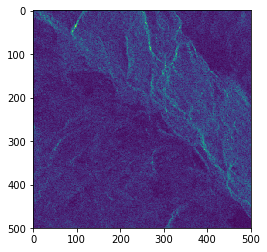

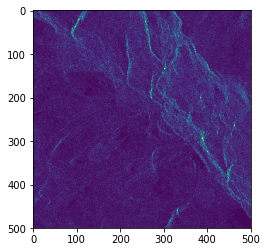

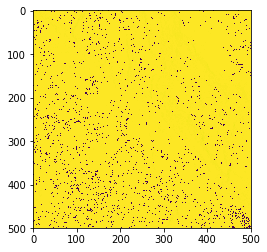

In [65]:
sub_arr = arr[:, 500:1000, 500:1000]
plt.imshow(sub_arr[0])
plt.show()
plt.imshow(sub_arr[1])
plt.show()
plt.imshow(sub_arr[0] - sub_arr[1])

In [66]:
help(api.query)

Help on method query in module sentinelsat.sentinel:

query(area=None, date=None, raw=None, area_relation='Intersects', order_by=None, limit=None, offset=0, **keywords) method of sentinelsat.sentinel.SentinelAPI instance
    Query the OpenSearch API with the coordinates of an area, a date interval
    and any other search keywords accepted by the API.
    
    Parameters
    ----------
    area : str, optional
        The area of interest formatted as a Well-Known Text string.
    date : tuple of (str or datetime) or str, optional
        A time interval filter based on the Sensing Start Time of the products.
        Expects a tuple of (start, end), e.g. ("NOW-1DAY", "NOW").
        The timestamps can be either a Python datetime or a string in one of the
        following formats:
            - yyyyMMdd
            - yyyy-MM-ddThh:mm:ss.SSSZ (ISO-8601)
            - yyyy-MM-ddThh:mm:ssZ
            - NOW
            - NOW-<n>DAY(S) (or HOUR(S), MONTH(S), etc.)
            - NOW+<n>DAY(